In [40]:
import os 
import pandas as pd
import numpy as np

import IPython.display as ipd

import librosa
import librosa.display
import matplotlib.pyplot as plt

import processing
import event_manager
import epoching

pd.set_option('max_colwidth', 400)
pd.set_option('display.max_rows',100)

In [41]:
audio_folder = '../../data/ICBHI_final_database'
list_audio_files = processing.get_list_recording(audio_folder)
print('Found {} recording files'.format(len(list_audio_files)))

Found 920 recording files


In [42]:
n_fft =512
win_len=0.200
win_shift=0.100
audio_file = '222_1b1_Pr_sc_Meditron'
audio_file = '223_1b1_Lr_sc_Meditron'

audio_subject = '107_2b3_Ar_mc_AKGC417L' #crackle example
#audio_subject = '124_1b1_Pl_sc_Litt3200'


In [43]:
import model_prepare
data_file = processing.load_file_from_recording_name(audio_folder,audio_file)
data_filtered,df_label = processing.preprocess_data(data_file,lf=120,hf=5000,fs=22050, annotations='event')
df_label.head()
df_label = event_manager.fill_gap_event_frame(df_label,data_filtered)
df_label = event_manager.segment_event_annotation(data_filtered,win_len=win_len,win_shift=win_shift,threshold_class=[1,None,None])
df_label['file']=audio_file
df_label = model_prepare.select_nsample_normal(df_label)

,start,end,label,file
0,2.405866,3.171583,2,223_1b1_Lr_sc_Meditron
1,5.104784,5.884681,2,223_1b1_Lr_sc_Meditron
2,8.181834,9.094077,2,223_1b1_Lr_sc_Meditron
3,11.334510,12.171128,2,223_1b1_Lr_sc_Meditron
4,14.709339,15.484510,2,223_1b1_Lr_sc_Meditron


In [47]:
data_file = processing.load_file_from_recording_name(audio_folder,audio_file)
data_filtered4000,df_label4000 = processing.preprocess_data(data_file,lf=120,hf=1800,fs=4000, annotations='event')
df_label4000.head()
df_label4000 = event_manager.fill_gap_event_frame(df_label4000,data_filtered)
df_label4000 = event_manager.segment_event_annotation(data_filtered,win_len=win_len,win_shift=win_shift,threshold_class=[1,None,None])
df_label4000['file']=audio_file
df_label4000 = model_prepare.select_nsample_normal(df_label4000)

In [49]:
epochs_ = epoching.get_epoching_from_label_data(data_filtered,df_label,constant_values=0)
X = np.abs(librosa.stft(y=epochs_,n_fft=n_fft))
f = librosa.fft_frequencies(sr=data_filtered['fs'], n_fft=n_fft)
index = np.where(f < 2000)[0]
X_stft = X[:,index,:]
print(X.shape)

epochs_ = epoching.get_epoching_from_label_data(data_filtered,df_label,constant_values=0)
X,f = processing.apply_wavelets_on_epochs(epochs_,data_filtered['fs'])
index = np.where(f < 2000)[0]
X_wv = X[:,index,:]
print(X.shape)


epochs_ = epoching.get_epoching_from_label_data(data_filtered4000,df_label4000,constant_values=0)
X,f = processing.apply_wavelets_on_epochs(epochs_,data_filtered4000['fs'])
index = np.where(f < 2000)[0]
X_wv4 = X[:,index,:]
print(X.shape)

(10, 257, 169)


ValueError: too many values to unpack (expected 2)

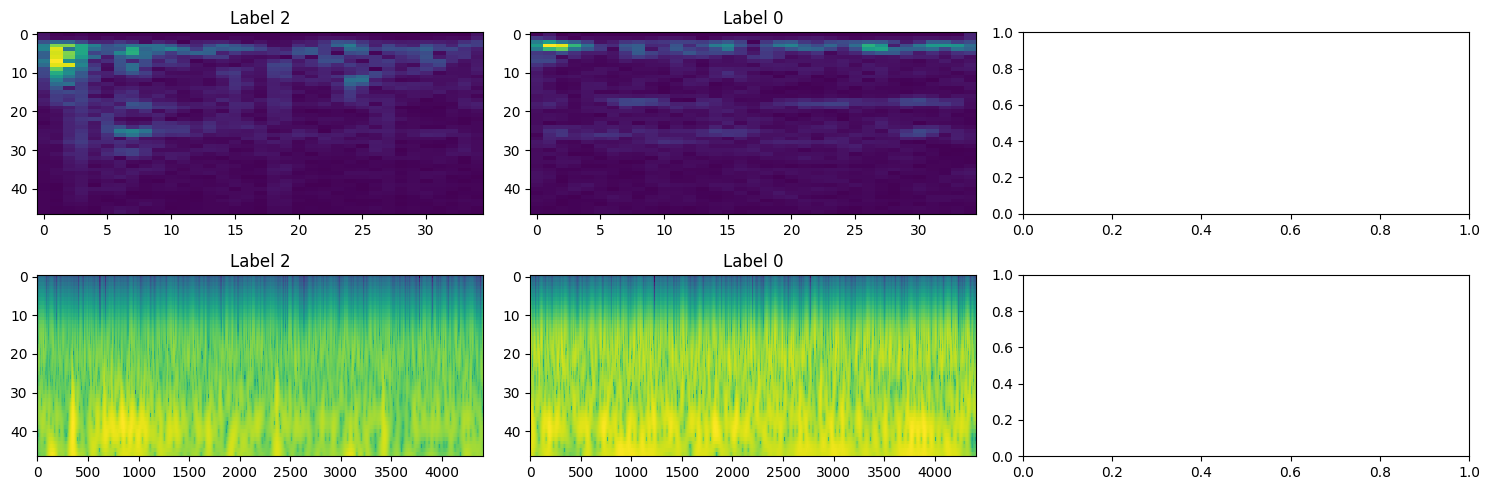

In [38]:
f,axes=plt.subplots(3,3,figsize=(15,5))
for i,label in enumerate(df_label.label.unique()):
    index = df_label[df_label.label==label].sample().index[0]
    xx = X_stft[index,:]
    axes[0,i].imshow(xx,interpolation='nearest', aspect='auto')
    axes[0,i].set_title('Label {}'.format(label))
    
    xx = X_wv[index,:]
    xx = xx-xx.min()/(xx.max() - xx.min())
    axes[1,i].imshow(xx,interpolation='nearest', aspect='auto')
    axes[1,i].set_title('Label {}'.format(label))
    
    
    xx = X_wv4[index,:]
    xx = xx-xx.min()/(xx.max() - xx.min())
    axes[1,i].imshow(xx,interpolation='nearest', aspect='auto')
    axes[1,i].set_title('Label {}'.format(label))
plt.tight_layout()